<h1 align="center">Fase 2 - Machine Learning and Time Series</h1>

## Módulo 01 - Machine Learning com Python

### Aula 1 - Bibliotecas Fundamentais e Primeiros Passos em ML

#### 1. Para realizar a análise dos dados, as seguintes bibliotecas foram utilizadas:
* **sys**: para manipulação de variáveis do sistema.
* **os**: para manipulação de arquivos e diretórios.
* **Pandas**: para manipulação e análise dos dados.
* **Numpy**: para manipulação de arrays e operações matemáticas.
* **Matplotlib**: para visualização dos dados.
* **Scikit-learn**: para aplicação de algoritmos de Machine Learning.


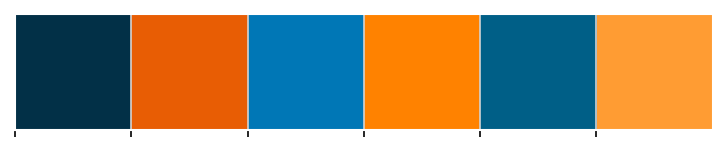

In [1]:
# Data manipulation and visualization.
import sys
import os
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

# Add the project root directory to sys.path
sys.path.append(os.path.abspath('../../'))

# Now try importing the module
from scripts.data_visualization.style_visualization import *
from scripts.data_visualization.plot_visualization import *
from scripts.data_analysis.outlier_detection import *
from scripts.utils.custom_exceptions import *

# Set up the visualization environment with a custom color palette
custom_palette = ['#023047', '#e85d04', '#0077b6', '#ff8200', '#005f87', '#ff9c33']
configure_visualization(palette=custom_palette)

#### 2. Aquisição dos dados
Os dados utilizados foram fornecidos em aula  e estão disponíveis no github da Pos-Tech da FIAP. O arquivo traz informações sobre diabetes e foi utilizado para a aplicação de algoritmos de Machine Learning. fonte dos dados: https://github.com/FIAP/Pos_Tech_DTAT/blob/61a634996879d5c1384af6f567e29659ad68b727/Aula%2002/Base%20de%20Dados/diabetes.csv

### Importando a Base de dados 

In [2]:
# Corrigir o caminho para subir um nível na estrutura de diretórios antes de acessar 'data/raw'
file_path = os.path.join(os.path.abspath('../../'), 'data/raw/diabetes.csv')

df_diabetes = pd.read_csv('../../data/raw/diabetes.csv')

In [3]:
df_diabetes.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
x = df_diabetes.drop(['Class variable'], axis=1)

In [7]:
y = df_diabetes['Class variable']

In [8]:
y

0      1
1      0
2      1
3      0
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
30     0
31     1
32     0
33     0
34     0
35     0
36     0
37     1
38     1
39     1
40     0
41     0
42     0
43     1
44     0
45     1
46     0
47     0
48     1
49     0
50     0
51     0
52     0
53     1
54     0
55     0
56     1
57     0
58     0
59     0
60     0
61     1
62     0
63     0
64     1
65     0
66     1
67     0
68     0
69     0
70     1
71     0
72     1
73     0
74     0
75     0
76     0
77     0
78     1
79     0
80     0
81     0
82     0
83     0
84     1
85     0
86     0
87     0
88     1
89     0
90     0
91     0
92     0
93     1
94     0
95     0
96     0
97     0
98     0
99     1
100    1
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    1
110    1
1